#Hackathon 5: Environmental Agency

In [ ]:
pip install folium matplotlib mapclassify palettable descartes pysal contextily matplotlib_scalebar geopandas

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [ ]:
#Import packages
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import palettable as pltt
from pysal.viz import mapclassify
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib_scalebar.scalebar import ScaleBar
import mapclassify
import matplotlib.patches as mpatches
import datetime
import math
from scipy.stats import pearsonr

## Data Set-Up

In [ ]:
#Load excel
xls = pd.ExcelFile('Anonymised data 2023 mapped.xlsx')

#Create dataset for each excel sheet
Principle_Data = pd.read_excel(xls, 0)
Investigation_samples = pd.read_excel(xls, 1) #colony forming units for 100mL
Statutory_samples = pd.read_excel(xls, 2) #
Tide_data = pd.read_excel(xls, 3)
STW_flow_UV = pd.read_excel(xls, 4)
Seabird = pd.read_excel(xls, 5)
MST_Site1 = pd.read_excel(xls, 6)
UV_Wind = pd.read_excel(xls, 7)
Add_data = pd.read_excel(xls, 8)
Discharge_Site1 = pd.read_excel(xls, 9)
Discharge_Site2 = pd.read_excel(xls, 10)
Discharge_Site3 = pd.read_excel(xls, 11)
Discharge_Site4 = pd.read_excel(xls, 12)
Discharge_Site5 = pd.read_excel(xls, 13)
Discharge_Site6 = pd.read_excel(xls, 14)
Discharge_Site7 = pd.read_excel(xls, 15)
Discharge_Site8 = pd.read_excel(xls, 16)
Discharge_Site9 = pd.read_excel(xls, 17)

In [ ]:
Principle_Data.head()

,Date,Time BST,Time GMT,Day 24hr period,Day,RF mm (GMT)
0,2023-05-01 00:00:00,NaN,00:00:00,2023-05-01,1,0.0
1,2023-05-01 00:15:00,NaN,00:15:00,NaT,NaN,0.2
2,2023-05-01 00:30:00,NaN,00:30:00,NaT,NaN,0.0
3,2023-05-01 00:45:00,NaN,00:45:00,NaT,NaN,0.0
4,2023-05-01 01:00:00,NaN,01:00:00,NaT,NaN,0.0


In [ ]:
Investigation_samples.head()

,Date,Time GMT,Site 1 EC Inv,Site 1 IE Inv
0,2023-06-20,13:00:00,10,18
1,2023-06-28,09:45:00,8,2
2,2023-07-11,07:00:00,80,340
3,2023-07-11,07:30:00,85,310
4,2023-07-11,08:00:00,20,26


# Data Cleaning

## Adding Rainfall data

First, need to create a datetime column.

In [ ]:
Principle_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17667 entries, 0 to 17666
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             17664 non-null  datetime64[ns]
 1   Time BST         0 non-null      float64       
 2   Time GMT         17667 non-null  object        
 3   Day 24hr period  6712 non-null   datetime64[ns]
 4   Day              153 non-null    object        
 5   RF mm (GMT)      14688 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 828.3+ KB


In [ ]:
Investigation_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           115 non-null    datetime64[ns]
 1   Time GMT       115 non-null    object        
 2   Site 1 EC Inv  115 non-null    int64         
 3   Site 1 IE Inv  115 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.7+ KB


In [ ]:
#Convert Date to string
#And create a datetime column by adding Date and Time GMT columns together
#Do this for both the rainfall (Principle_Data) and the bacteria (Investigation_samples) datasets

Principle_Data['datetime'] = pd.to_datetime(Principle_Data['Date'].dt.strftime('%Y-%m-%d') + ' ' + Principle_Data['Time GMT'])
Investigation_samples['datetime'] = pd.to_datetime(Investigation_samples['Date'].dt.strftime('%Y-%m-%d') + ' ' + Investigation_samples['Time GMT'])

In [ ]:
#Check
Investigation_samples.head()

,Date,Time GMT,Site 1 EC Inv,Site 1 IE Inv,datetime
0,2023-06-20,13:00:00,10,18,2023-06-20 13:00:00
1,2023-06-28,09:45:00,8,2,2023-06-28 09:45:00
2,2023-07-11,07:00:00,80,340,2023-07-11 07:00:00
3,2023-07-11,07:30:00,85,310,2023-07-11 07:30:00
4,2023-07-11,08:00:00,20,26,2023-07-11 08:00:00


Second, need to create rainfall lag data column, so all the rainfall in the 24h, 48h and 72h preceeding the bacteria sample.

In [ ]:
#Create function to create lagged rainfall for each bacteria sample

#Loop through each bacteria sample and compute cumulative rainfall in the period before the sample
#(24, 48 and 72 hours before)

def calculate_lagged_rainfall(rainfall, bacteria):
    lag_hours = [24, 48, 72]
    results = []

    for i, row in bacteria.iterrows():
        sample_time = row['datetime']
        new_row = row.copy()

        for h in lag_hours:
            start = sample_time - pd.Timedelta(hours=h)
            end = sample_time
            total_rain = rainfall[(rainfall['datetime'] >= start) & (rainfall['datetime'] < end)]['RF mm (GMT)'].sum()
            new_row[f'Rainfall_last_{h}h'] = total_rain

        results.append(new_row)

    return pd.DataFrame(results)

In [ ]:
#Run function
Bacteria_with_rain = calculate_lagged_rainfall(Principle_Data, Investigation_samples)
Bacteria_with_rain.head()

,Date,Time GMT,Site 1 EC Inv,Site 1 IE Inv,datetime,Rainfall_last_24h,Rainfall_last_48h,Rainfall_last_72h
0,2023-06-20,13:00:00,10,18,2023-06-20 13:00:00,6.8,32.0,32.0
1,2023-06-28,09:45:00,8,2,2023-06-28 09:45:00,2.0,2.2,7.2
2,2023-07-11,07:00:00,80,340,2023-07-11 07:00:00,3.6,5.8,8.0
3,2023-07-11,07:30:00,85,310,2023-07-11 07:30:00,3.6,5.8,8.0
4,2023-07-11,08:00:00,20,26,2023-07-11 08:00:00,4.0,6.2,8.4


## Adding tide data in

In [ ]:
Tide_data.head()

,Date,Tide Astronomical (MaOD),Spring High,Spring Low,Neap High,Neap low
0,2023-05-01 00:00:00,0.93,3.3,-2.87,1.14,-0.27
1,2023-05-01 00:15:00,1.06,3.3,-2.87,1.14,-0.27
2,2023-05-01 00:30:00,1.18,3.3,-2.87,1.14,-0.27
3,2023-05-01 00:45:00,1.28,3.3,-2.87,1.14,-0.27
4,2023-05-01 01:00:00,1.37,3.3,-2.87,1.14,-0.27


In [ ]:
Tide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17667 entries, 0 to 17666
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      17664 non-null  datetime64[ns]
 1   Tide Astronomical (MaOD)  17667 non-null  float64       
 2   Spring High               17667 non-null  float64       
 3   Spring Low                17667 non-null  float64       
 4   Neap High                 17667 non-null  float64       
 5   Neap low                  17667 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 828.3 KB


In [ ]:
Tide_data2 = Tide_data[['Date', 'Tide Astronomical (MaOD)']]
Tide_data2.head()

,Date,Tide Astronomical (MaOD)
0,2023-05-01 00:00:00,0.93
1,2023-05-01 00:15:00,1.06
2,2023-05-01 00:30:00,1.18
3,2023-05-01 00:45:00,1.28
4,2023-05-01 01:00:00,1.37


In [ ]:
#Rename column
Bacteria_with_rain.rename(columns={'Date': 'Date_NA'}, inplace=True)
Bacteria_with_rain.rename(columns={'datetime': 'Date'}, inplace=True)
Bacteria_with_rain.head()

,Date_NA,Time GMT,Site 1 EC Inv,Site 1 IE Inv,Date,Rainfall_last_24h,Rainfall_last_48h,Rainfall_last_72h
0,2023-06-20,13:00:00,10,18,2023-06-20 13:00:00,6.8,32.0,32.0
1,2023-06-28,09:45:00,8,2,2023-06-28 09:45:00,2.0,2.2,7.2
2,2023-07-11,07:00:00,80,340,2023-07-11 07:00:00,3.6,5.8,8.0
3,2023-07-11,07:30:00,85,310,2023-07-11 07:30:00,3.6,5.8,8.0
4,2023-07-11,08:00:00,20,26,2023-07-11 08:00:00,4.0,6.2,8.4


In [ ]:
#Add the tide data in
Bacteria = Bacteria_with_rain.merge(Tide_data2, on='Date', how='left')
Bacteria.head()

,Date_NA,Time GMT,Site 1 EC Inv,Site 1 IE Inv,Date,Rainfall_last_24h,Rainfall_last_48h,Rainfall_last_72h,Tide Astronomical (MaOD)
0,2023-06-20,13:00:00,10,18,2023-06-20 13:00:00,6.8,32.0,32.0,-1.66
1,2023-06-28,09:45:00,8,2,2023-06-28 09:45:00,2.0,2.2,7.2,1.03
2,2023-07-11,07:00:00,80,340,2023-07-11 07:00:00,3.6,5.8,8.0,-0.09
3,2023-07-11,07:30:00,85,310,2023-07-11 07:30:00,3.6,5.8,8.0,0.31
4,2023-07-11,08:00:00,20,26,2023-07-11 08:00:00,4.0,6.2,8.4,0.71


## Add in the average sewage discharge data (in the past 24, 48 and 72 hours)

In [ ]:
STW_flow_UV.head()

,Date,Flow (l/s),UV Transmittance 1,UV Applied Dose_1,Max flow
0,2023-05-01 00:00:00,280.50982,56.288,31.795,NaN
1,2023-05-01 00:15:00,316.79994,56.801,28.864,NaN
2,2023-05-01 00:30:00,301.39775,51.893,30.037,NaN
3,2023-05-01 00:45:00,327.24391,49.89,27.546,NaN
4,2023-05-01 01:00:00,306.67246,49.206,29.597,NaN


In [ ]:
STW_flow_UV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14653 entries, 0 to 14652
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                14653 non-null  datetime64[ns]
 1   Flow (l/s)          14616 non-null  object        
 2   UV Transmittance 1  14653 non-null  object        
 3   UV Applied Dose_1   14653 non-null  object        
 4   Max flow            0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 572.5+ KB


In [ ]:
#Create function to calculate the average past sewage discharge for each bacteria sample

#Loop through each bacteria sample and compute average sewage in the period before the sample
#(24, 48 and 72 hours before)

def calculate_lagged_sewage(sewage, bacteria):
    lag_hours = [24, 48, 72]
    results = []

    for i, row in bacteria.iterrows():
        sample_time = row['Date']
        new_row = row.copy()

        for h in lag_hours:
            start = sample_time - pd.Timedelta(hours=h)
            end = sample_time
            total_rain = sewage[(sewage['Date'] >= start) & (sewage['Date'] < end)]['Flow (l/s)'].mean()
            new_row[f'Average Discharge_last_{h}h'] = total_rain

        results.append(new_row)

    return pd.DataFrame(results)

In [ ]:
#Run function
Bacteria = calculate_lagged_sewage(STW_flow_UV, Bacteria)
Bacteria.head()

,Date_NA,Time GMT,Site 1 EC Inv,Site 1 IE Inv,Date,Rainfall_last_24h,Rainfall_last_48h,Rainfall_last_72h,Tide Astronomical (MaOD),Average Discharge_last_24h,Average Discharge_last_48h,Average Discharge_last_72h
0,2023-06-20,13:00:00,10,18,2023-06-20 13:00:00,6.8,32.0,32.0,-1.66,116.956024,151.159863,123.208403
1,2023-06-28,09:45:00,8,2,2023-06-28 09:45:00,2.0,2.2,7.2,1.03,93.872511,89.194490,101.057858
2,2023-07-11,07:00:00,80,340,2023-07-11 07:00:00,3.6,5.8,8.0,-0.09,116.749429,108.013167,106.090823
3,2023-07-11,07:30:00,85,310,2023-07-11 07:30:00,3.6,5.8,8.0,0.31,122.297780,111.035694,108.078002
4,2023-07-11,08:00:00,20,26,2023-07-11 08:00:00,4.0,6.2,8.4,0.71,126.231503,113.329478,109.530635


## Add in the average UV Index (in the past 24, 48 and 72 hours)

In [ ]:
UV_Wind.head()

,DateTimeGMT,Date,Time (GMT),UVIndex,Wind_Sp,Wind_Dir
0,2023-04-27 00:00:00,2023-04-27,00:00:00,0,2.97,170
1,2023-04-26 15:00:00,2023-04-26,15:00:00,2,4.27,144
2,2023-04-26 14:00:00,2023-04-26,14:00:00,2,4.03,140
3,2023-04-26 13:00:00,2023-04-26,13:00:00,3,2.46,151
4,2023-04-26 12:00:00,2023-04-26,12:00:00,4,2.33,148


In [ ]:
UV_Wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTimeGMT  3816 non-null   datetime64[ns]
 1   Date         3816 non-null   datetime64[ns]
 2   Time (GMT)   3816 non-null   object        
 3   UVIndex      3816 non-null   int64         
 4   Wind_Sp      3816 non-null   float64       
 5   Wind_Dir     3816 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 179.0+ KB


In [ ]:
#Create function to calculate the average past UV index for each bacteria sample

#Loop through each bacteria sample and compute average UV index in the period before the sample
#(24, 48 and 72 hours before)

def calculate_lagged_UV(UV_index, bacteria):
    lag_hours = [24, 48, 72]
    results = []

    for i, row in bacteria.iterrows():
        sample_time = row['Date']
        new_row = row.copy()

        for h in lag_hours:
            start = sample_time - pd.Timedelta(hours=h)
            end = sample_time
            total_rain = UV_index[(UV_index['Date'] >= start) & (UV_index['Date'] < end)]['UVIndex'].mean()
            new_row[f'Average UV_last_{h}h'] = total_rain

        results.append(new_row)

    return pd.DataFrame(results)

In [ ]:
#Run function
Bacteria = calculate_lagged_UV(UV_Wind, Bacteria)
Bacteria.head()

,Date_NA,Time GMT,Site 1 EC Inv,Site 1 IE Inv,Date,Rainfall_last_24h,Rainfall_last_48h,Rainfall_last_72h,Tide Astronomical (MaOD),Average Discharge_last_24h,Average Discharge_last_48h,Average Discharge_last_72h,Average UV_last_24h,Average UV_last_48h,Average UV_last_72h
0,2023-06-20,13:00:00,10,18,2023-06-20 13:00:00,6.8,32.0,32.0,-1.66,116.956024,151.159863,123.208403,1.458333,1.854167,1.888889
1,2023-06-28,09:45:00,8,2,2023-06-28 09:45:00,2.0,2.2,7.2,1.03,93.872511,89.194490,101.057858,1.958333,1.812500,2.000000
2,2023-07-11,07:00:00,80,340,2023-07-11 07:00:00,3.6,5.8,8.0,-0.09,116.749429,108.013167,106.090823,2.041667,2.020833,1.958333
3,2023-07-11,07:30:00,85,310,2023-07-11 07:30:00,3.6,5.8,8.0,0.31,122.297780,111.035694,108.078002,2.041667,2.020833,1.958333
4,2023-07-11,08:00:00,20,26,2023-07-11 08:00:00,4.0,6.2,8.4,0.71,126.231503,113.329478,109.530635,2.041667,2.020833,1.958333


## Add in the average Wind Speed (in the past 24, 48 and 72 hours)

In [ ]:
UV_Wind.head()

,DateTimeGMT,Date,Time (GMT),UVIndex,Wind_Sp,Wind_Dir
0,2023-04-27 00:00:00,2023-04-27,00:00:00,0,2.97,170
1,2023-04-26 15:00:00,2023-04-26,15:00:00,2,4.27,144
2,2023-04-26 14:00:00,2023-04-26,14:00:00,2,4.03,140
3,2023-04-26 13:00:00,2023-04-26,13:00:00,3,2.46,151
4,2023-04-26 12:00:00,2023-04-26,12:00:00,4,2.33,148


In [ ]:
UV_Wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTimeGMT  3816 non-null   datetime64[ns]
 1   Date         3816 non-null   datetime64[ns]
 2   Time (GMT)   3816 non-null   object        
 3   UVIndex      3816 non-null   int64         
 4   Wind_Sp      3816 non-null   float64       
 5   Wind_Dir     3816 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 179.0+ KB


In [ ]:
#Create function to calculate the average past UV index for each bacteria sample

#Loop through each bacteria sample and compute average UV index in the period before the sample
#(24, 48 and 72 hours before)

def calculate_lagged_Wind(Wind_speed, bacteria):
    lag_hours = [24, 48, 72]
    results = []

    for i, row in bacteria.iterrows():
        sample_time = row['Date']
        new_row = row.copy()

        for h in lag_hours:
            start = sample_time - pd.Timedelta(hours=h)
            end = sample_time
            total_rain = Wind_speed[(Wind_speed['Date'] >= start) & (Wind_speed['Date'] < end)]['Wind_Sp'].mean()
            new_row[f'Average WindSpeed_last_{h}h'] = total_rain

        results.append(new_row)

    return pd.DataFrame(results)

In [ ]:
#Run function
Bacteria = calculate_lagged_Wind(UV_Wind, Bacteria)
Bacteria.head()

,Date_NA,Time GMT,Site 1 EC Inv,Site 1 IE Inv,Date,Rainfall_last_24h,Rainfall_last_48h,Rainfall_last_72h,Tide Astronomical (MaOD),Average Discharge_last_24h,Average Discharge_last_48h,Average Discharge_last_72h,Average UV_last_24h,Average UV_last_48h,Average UV_last_72h,Average WindSpeed_last_24h,Average WindSpeed_last_48h,Average WindSpeed_last_72h
0,2023-06-20,13:00:00,10,18,2023-06-20 13:00:00,6.8,32.0,32.0,-1.66,116.956024,151.159863,123.208403,1.458333,1.854167,1.888889,2.513333,3.153542,3.442222
1,2023-06-28,09:45:00,8,2,2023-06-28 09:45:00,2.0,2.2,7.2,1.03,93.872511,89.194490,101.057858,1.958333,1.812500,2.000000,3.544583,3.676458,4.219722
2,2023-07-11,07:00:00,80,340,2023-07-11 07:00:00,3.6,5.8,8.0,-0.09,116.749429,108.013167,106.090823,2.041667,2.020833,1.958333,5.117500,4.763958,4.242083
3,2023-07-11,07:30:00,85,310,2023-07-11 07:30:00,3.6,5.8,8.0,0.31,122.297780,111.035694,108.078002,2.041667,2.020833,1.958333,5.117500,4.763958,4.242083
4,2023-07-11,08:00:00,20,26,2023-07-11 08:00:00,4.0,6.2,8.4,0.71,126.231503,113.329478,109.530635,2.041667,2.020833,1.958333,5.117500,4.763958,4.242083


Export cleaned dataset

In [ ]:
Bacteria.to_csv("Bacteria.csv", index=False)

# Statistics and Relationships Investigation

## Bacteria VS Rainfall

Next, we investigate the correlation between rainfall and bacteria:
* EC Bacteria VS Rainfall 24h
* EC Bacteria VS Rainfall 48h
* EC Bacteria VS Rainfall 72h
* IE Bacteria VS Rainfall 24h
* IE Bacteria VS Rainfall 48h
* IE Bacteria VS Rainfall 72h

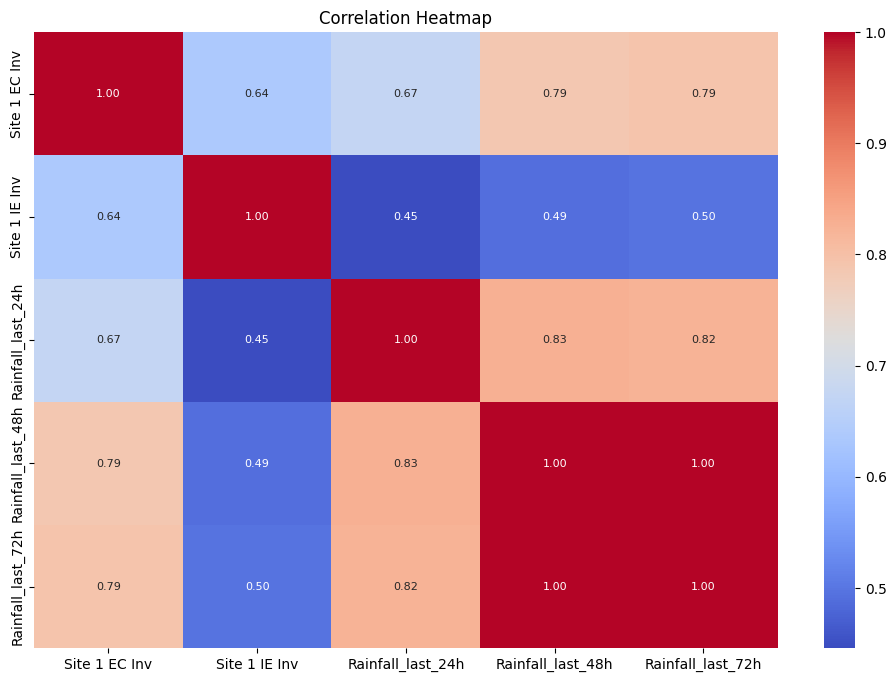

In [ ]:
#Create correlation matrix
Cor_matrix = Bacteria[['Site 1 EC Inv', 'Site 1 IE Inv','Rainfall_last_24h', 'Rainfall_last_48h', 'Rainfall_last_72h']]

#Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = Cor_matrix.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Pearson correlations for Bacteria EC

In [ ]:
# Calculate Pearson correlation coefficient and p-value

#Site 1 EC Inv VS Rainfall_last_24h
corr_coef, p_value = pearsonr(Bacteria['Site 1 EC Inv'], Bacteria['Rainfall_last_24h'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: 0.6741
P-value: 1.4847e-16


In [ ]:
# Calculate Pearson correlation coefficient and p-value

#Site 1 EC Inv VS Rainfall_last_48h
corr_coef, p_value = pearsonr(Bacteria['Site 1 EC Inv'], Bacteria['Rainfall_last_48h'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: 0.7869
P-value: 1.9198e-25


In [ ]:
# Calculate Pearson correlation coefficient and p-value

#Site 1 EC Inv VS Rainfall_last_72h
corr_coef, p_value = pearsonr(Bacteria['Site 1 EC Inv'], Bacteria['Rainfall_last_72h'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: 0.7931
P-value: 4.3718e-26


Pearson correlations for Bacteria IE

In [ ]:
# Calculate Pearson correlation coefficient and p-value

#Site 1 IE Inv VS Rainfall_last_24h
corr_coef, p_value = pearsonr(Bacteria['Site 1 IE Inv'], Bacteria['Rainfall_last_24h'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: 0.4458
P-value: 5.9417e-07


In [ ]:
# Calculate Pearson correlation coefficient and p-value

#Site 1 IE Inv VS Rainfall_last_48h
corr_coef, p_value = pearsonr(Bacteria['Site 1 IE Inv'], Bacteria['Rainfall_last_48h'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: 0.4912
P-value: 2.4888e-08


In [ ]:
# Calculate Pearson correlation coefficient and p-value

#Site 1 IE Inv VS Rainfall_last_72h
corr_coef, p_value = pearsonr(Bacteria['Site 1 IE Inv'], Bacteria['Rainfall_last_72h'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: 0.4976
P-value: 1.5303e-08


**Example visualizations of relationship for dashboard:**

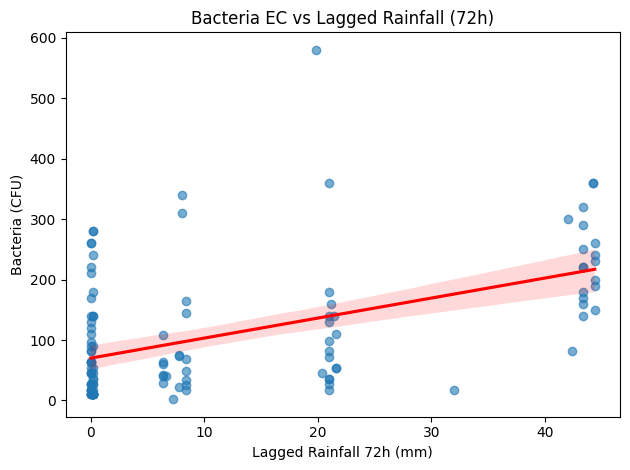

In [ ]:
#Create a scatter plot where x is EC Bacteria  and y is rainfall
#with 95% confidence interval of regression line
sns.regplot(
    data=Bacteria,
    x='Rainfall_last_72h',
    y='Site 1 IE Inv',
    scatter_kws={'alpha':0.6},   # semi-transparent points
    line_kws={'color':'red'},    # red regression line
    ci=95                        # 95% confidence interval
)

plt.title('Bacteria EC vs Lagged Rainfall (72h)')
plt.xlabel('Lagged Rainfall 72h (mm)')
plt.ylabel('Bacteria (CFU)')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

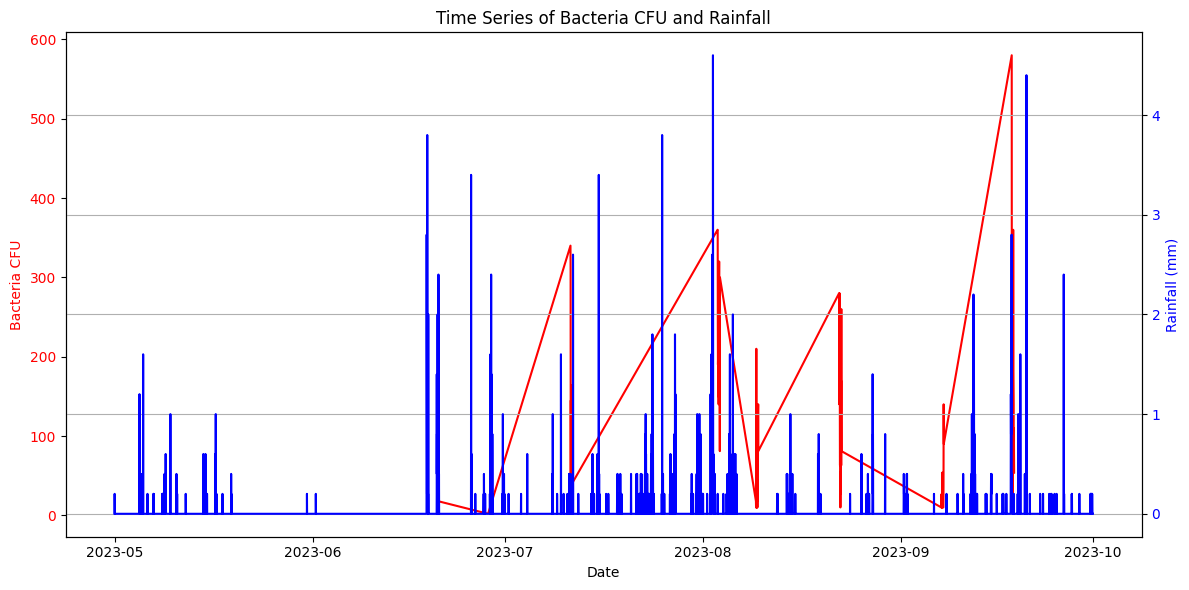

In [ ]:
#Attempted Line chart

plt.figure(figsize=(12, 6))

# Create the first y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

#Plot Bacteria on the primary y-axis
ax1.plot(Bacteria['Date'], Bacteria['Site 1 IE Inv'], color='red', label='Bacteria IE (CFU)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bacteria CFU', color='red')
ax1.tick_params(axis='y', labelcolor='red')

#Plot rainfall on second y-axis
ax2 = ax1.twinx()
ax2.plot(Principle_Data['Date'], Principle_Data['RF mm (GMT)'], color='blue', label='Rainfall (mm)')
ax2.set_ylabel('Rainfall (mm)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and grid
plt.title('Time Series of Bacteria CFU and Rainfall')
fig.tight_layout()
plt.grid(True)
plt.show()

## Bacteria VS Tide

Pearson correlations for Bacteria EC

In [ ]:
# Calculate Pearson correlation coefficient and p-value

#Site 1 EC Inv VS Tide
corr_coef, p_value = pearsonr(Bacteria['Site 1 EC Inv'], Bacteria['Tide Astronomical (MaOD)'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: -0.2730
P-value: 3.1577e-03


Pearson correlations for Bacteria IE

In [ ]:
# Calculate Pearson correlation coefficient and p-value

#Site 1 IE Inv VS Tide
corr_coef, p_value = pearsonr(Bacteria['Site 1 IE Inv'], Bacteria['Tide Astronomical (MaOD)'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: -0.1186
P-value: 2.0697e-01


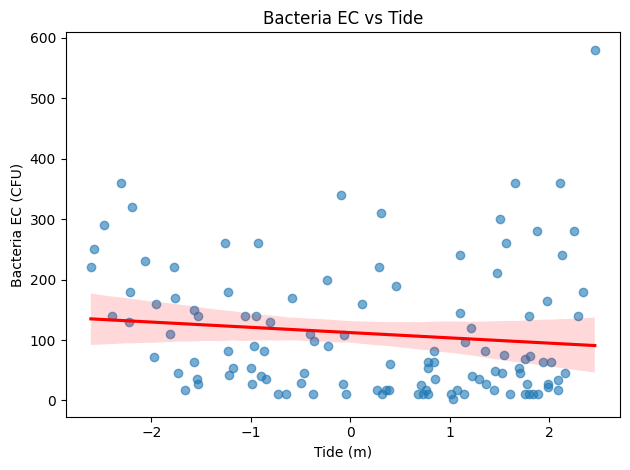

In [ ]:
#Create a scatter plot where x is EC Bacteria  and y is Tide
#with 95% confidence interval of regression line
sns.regplot(
    data=Bacteria,
    x='Tide Astronomical (MaOD)',
    y='Site 1 IE Inv',
    scatter_kws={'alpha':0.6},   # semi-transparent points
    line_kws={'color':'red'},    # red regression line
    ci=95                        # 95% confidence interval
)

plt.title('Bacteria EC vs Tide')
plt.xlabel('Tide (m)')
plt.ylabel('Bacteria EC (CFU)')
plt.tight_layout()
plt.show()

## Bacteria VS Sewage Discharge

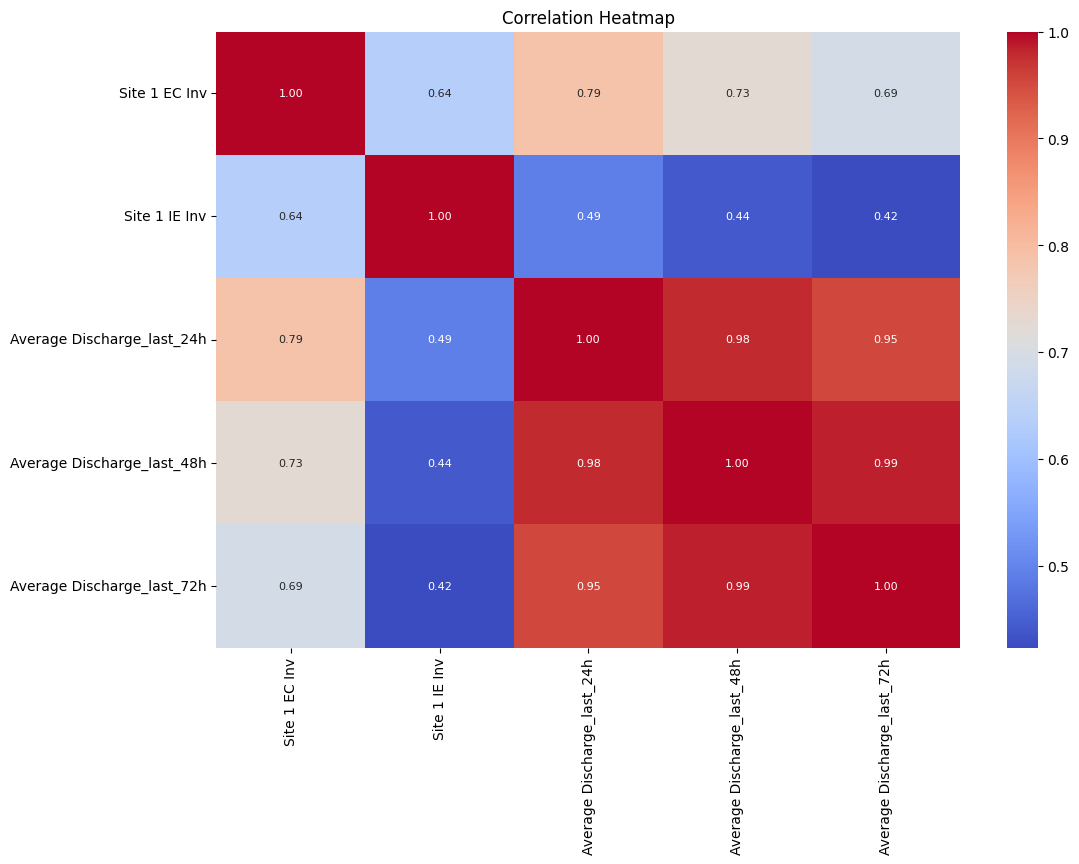

In [ ]:
#Create correlation matrix
Cor_matrix = Bacteria[['Site 1 EC Inv', 'Site 1 IE Inv','Average Discharge_last_24h', 'Average Discharge_last_48h', 'Average Discharge_last_72h']]

#Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = Cor_matrix.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Pearson correlations for Bacteria EC

In [ ]:
# Calculate Pearson correlation coefficient and p-value

#Site 1 EC Inv VS Average Discharge_last_24h
corr_coef, p_value = pearsonr(Bacteria['Site 1 EC Inv'], Bacteria['Average Discharge_last_24h'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: 0.7868
P-value: 1.9660e-25


In [ ]:
# Calculate Pearson correlation coefficient and p-value

#Site 1 EC Inv VS Average Discharge_last_48h
corr_coef, p_value = pearsonr(Bacteria['Site 1 EC Inv'], Bacteria['Average Discharge_last_48h'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: 0.7258
P-value: 4.4746e-20


In [ ]:
# Calculate Pearson correlation coefficient and p-value

#Site 1 EC Inv VS Average Discharge_last_72h
corr_coef, p_value = pearsonr(Bacteria['Site 1 EC Inv'], Bacteria['Average Discharge_last_72h'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: 0.6898
P-value: 1.5113e-17


Pearson correlations for Bacteria IE

In [ ]:
# Calculate Pearson correlation coefficient and p-value

#Site 1 IE Inv VS Average Discharge_last_24h
corr_coef, p_value = pearsonr(Bacteria['Site 1 IE Inv'], Bacteria['Average Discharge_last_24h'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: 0.4914
P-value: 2.4625e-08


In [ ]:
# Calculate Pearson correlation coefficient and p-value

#Site 1 IE Inv VS Average Discharge_last_48h
corr_coef, p_value = pearsonr(Bacteria['Site 1 IE Inv'], Bacteria['Average Discharge_last_48h'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: 0.4432
P-value: 7.0370e-07


In [ ]:
# Calculate Pearson correlation coefficient and p-value

#Site 1 IE Inv VS Average Discharge_last_72h
corr_coef, p_value = pearsonr(Bacteria['Site 1 IE Inv'], Bacteria['Average Discharge_last_72h'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: 0.4235
P-value: 2.4047e-06


**Example visualizations for dashboard:**

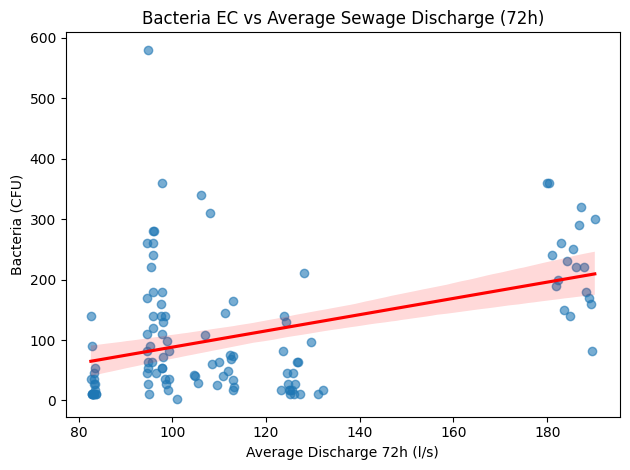

In [ ]:
#Create a scatter plot where x is EC Bacteria  and y is Average Discharge_last_72h
#with 95% confidence interval of regression line
sns.regplot(
    data=Bacteria,
    x='Average Discharge_last_72h',
    y='Site 1 IE Inv',
    scatter_kws={'alpha':0.6},   # semi-transparent points
    line_kws={'color':'red'},    # red regression line
    ci=95                        # 95% confidence interval
)

plt.title('Bacteria EC vs Average Sewage Discharge (72h)')
plt.xlabel('Average Discharge 72h (l/s)')
plt.ylabel('Bacteria (CFU)')
plt.tight_layout()
plt.show()

In [ ]:
STW_flow_UV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14653 entries, 0 to 14652
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                14653 non-null  datetime64[ns]
 1   Flow (l/s)          14616 non-null  object        
 2   UV Transmittance 1  14653 non-null  object        
 3   UV Applied Dose_1   14653 non-null  object        
 4   Max flow            0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 572.5+ KB


In [ ]:
#Check for NAs
STW_flow_UV['Flow (l/s)'].isna().sum()

np.int64(37)

In [ ]:
#Drop NAs in Flow
STW_flow_UV_clean = STW_flow_UV.dropna(subset=['Flow (l/s)'])

In [ ]:
STW_flow_UV_clean['Flow (l/s)'].isna().sum()

np.int64(0)

In [ ]:
STW_flow_UV_clean['Flow (l/s)'] = pd.to_numeric(STW_flow_UV_clean['Flow (l/s)'], errors='coerce')

<ipython-input-71-3e22f5b9a6cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  STW_flow_UV_clean['Flow (l/s)'] = pd.to_numeric(STW_flow_UV_clean['Flow (l/s)'], errors='coerce')


<Figure size 1200x600 with 0 Axes>

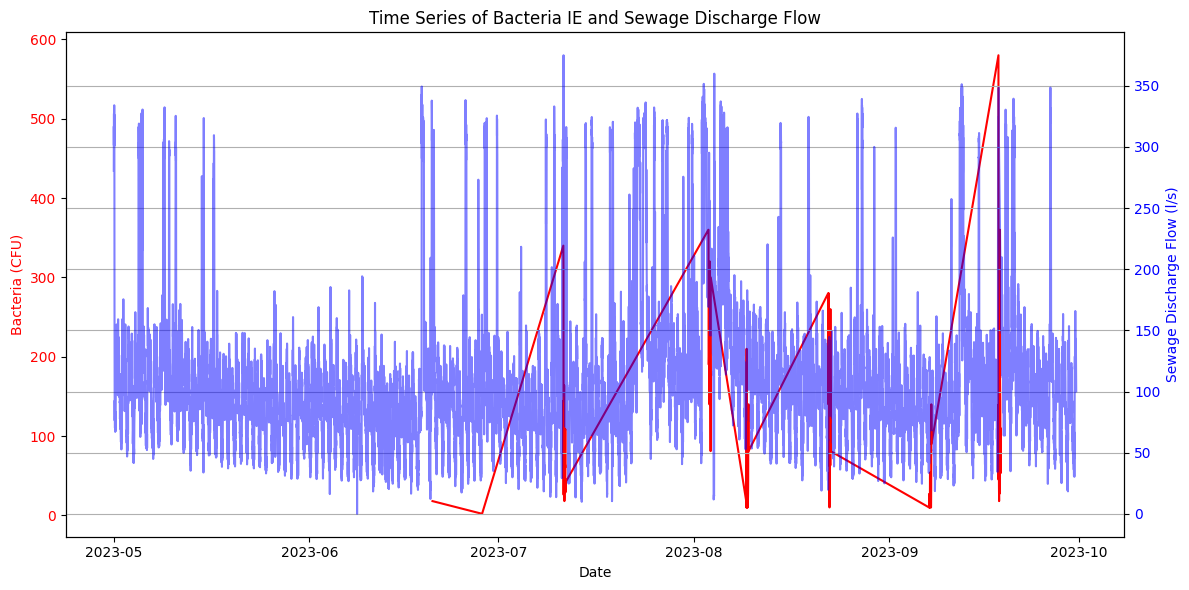

In [ ]:
#Attempted Line chart

plt.figure(figsize=(12, 6))

# Create the first y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

#Plot Bacteria on the primary y-axis
ax1.plot(Bacteria['Date'], Bacteria['Site 1 IE Inv'], color='red', label='Bacteria IE (CFU)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bacteria (CFU)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

#Plot Sewage Discharge flow on second y-axis
ax2 = ax1.twinx()
ax2.plot(STW_flow_UV_clean['Date'], STW_flow_UV_clean['Flow (l/s)'], color='blue', label='Flow (l/s)', alpha= 0.5)
ax2.set_ylabel('Sewage Discharge Flow (l/s)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and grid
plt.title('Time Series of Bacteria IE and Sewage Discharge Flow')
fig.tight_layout()
plt.grid(True)
plt.show()

## Bacteria VS Wind Speed

E.coli and Average Wind Speed

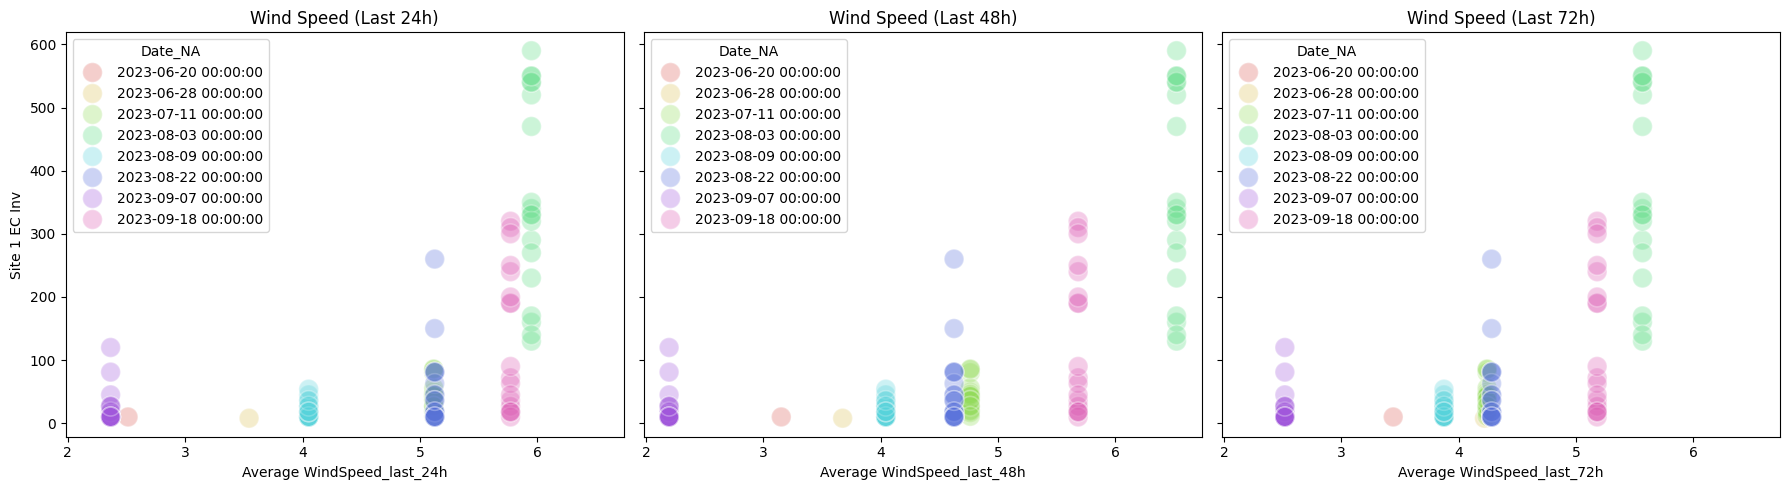

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)


sns.scatterplot(data=Bacteria, y="Site 1 EC Inv", x="Average WindSpeed_last_24h", hue='Date_NA', palette='hls', s=200, alpha=0.3, ax=axes[0])
axes[0].set_title("Wind Speed (Last 24h)")

sns.scatterplot(data=Bacteria, y="Site 1 EC Inv", x="Average WindSpeed_last_48h",hue='Date_NA', palette='hls', s=200, alpha=0.3, ax=axes[1])
axes[1].set_title("Wind Speed (Last 48h)")

sns.scatterplot(data=Bacteria, y="Site 1 EC Inv", x="Average WindSpeed_last_72h", hue='Date_NA', palette='hls', s=200, alpha=0.3, ax=axes[2])
axes[2].set_title("Wind Speed (Last 72h)")

plt.tight_layout()
plt.show()

In [ ]:
corr_coef, p_value = pearsonr(Bacteria["Site 1 EC Inv"], Bacteria["Average WindSpeed_last_24h"])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

corr_coef, p_value = pearsonr(Bacteria["Site 1 EC Inv"], Bacteria["Average WindSpeed_last_48h"])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

corr_coef, p_value = pearsonr(Bacteria["Site 1 EC Inv"], Bacteria["Average WindSpeed_last_72h"])
print(f'Pearson correlation coefficient: {corr_coef:.4f}')
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: 0.5149
P-value: 3.9401e-09
Pearson correlation coefficient: 0.6394
P-value: 1.4654e-14
Pearson correlation coefficient: 0.6258
P-value: 7.5380e-14


In [ ]:
UV_Wind.head()

,DateTimeGMT,Date,Time (GMT),UVIndex,Wind_Sp,Wind_Dir
0,2023-04-27 00:00:00,2023-04-27,00:00:00,0,2.97,170
1,2023-04-26 15:00:00,2023-04-26,15:00:00,2,4.27,144
2,2023-04-26 14:00:00,2023-04-26,14:00:00,2,4.03,140
3,2023-04-26 13:00:00,2023-04-26,13:00:00,3,2.46,151
4,2023-04-26 12:00:00,2023-04-26,12:00:00,4,2.33,148


<Figure size 1200x600 with 0 Axes>

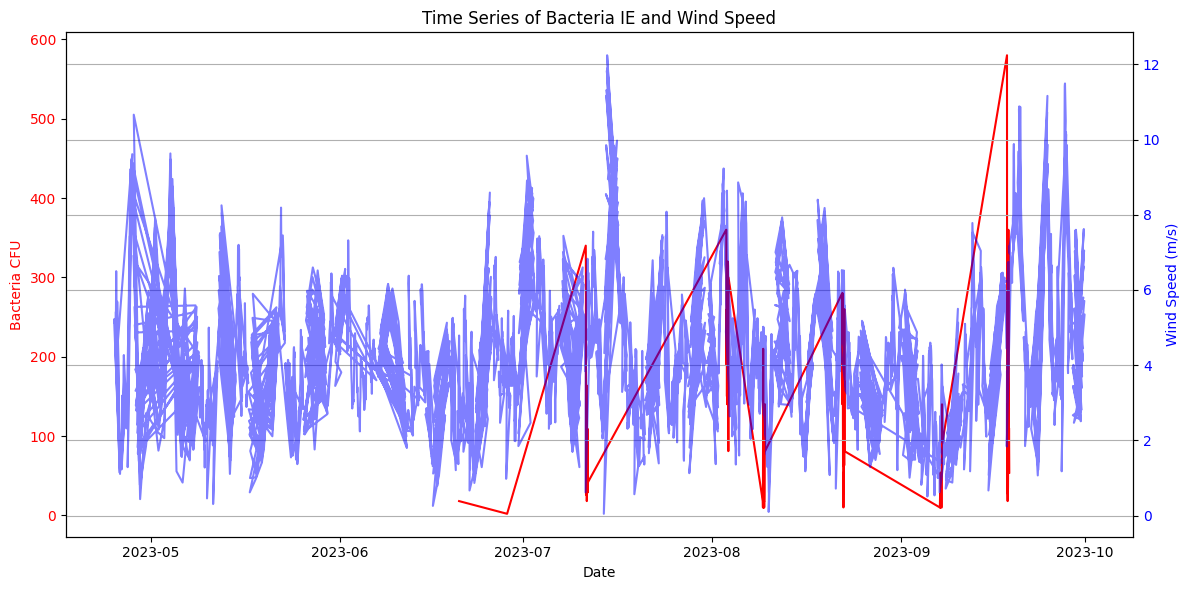

In [ ]:
#Attempted Line chart

plt.figure(figsize=(12, 6))

# Create the first y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

#Plot Bacteria on the primary y-axis
ax1.plot(Bacteria['Date'], Bacteria['Site 1 IE Inv'], color='red', label='Bacteria IE (CFU)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bacteria CFU', color='red')
ax1.tick_params(axis='y', labelcolor='red')

#Plot UV on second y-axis
ax2 = ax1.twinx()
ax2.plot(UV_Wind['DateTimeGMT'], UV_Wind['Wind_Sp'], color='blue', label='Wind Speed (m/s)', alpha= 0.5)
ax2.set_ylabel('Wind Speed (m/s)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and grid
plt.title('Time Series of Bacteria IE and Wind Speed')
fig.tight_layout()
plt.grid(True)
plt.show()

## Bacteria VS UV Index

In [ ]:
results = []
for target in ["Site 1 EC Inv", "Site 1 IE Inv"]:
    for h in [24, 48, 72]:
        x_col = f"Average UV_last_{h}h"
        y_col = target
        temp = Bacteria[[x_col, y_col]].dropna()
        r, p = pearsonr(temp[x_col], temp[y_col])
        results.append({
            "Bacteria Type": "E. coli" if "EC" in target else "IE",
            "Lag Time (h)": h,
            "Pearson r": round(r, 3),
            "p-value": round(p, 4),
            "Trend": "negative" if r < 0 else "postive"
        })

corr_df = pd.DataFrame(results)
corr_df.sort_values(by=["Bacteria Type", "Lag Time (h)"], inplace=True)
print(corr_df)

  Bacteria Type  Lag Time (h)  Pearson r  p-value     Trend
0       E. coli            24      0.086   0.3634   postive
1       E. coli            48     -0.268   0.0038  negative
2       E. coli            72     -0.224   0.0161  negative
3            IE            24      0.115   0.2202   postive
4            IE            48     -0.093   0.3239  negative
5            IE            72     -0.083   0.3774  negative


In [ ]:
import plotly.express as px

# heatmap
heatmap_data = corr_df.pivot(index="Bacteria Type", columns="Lag Time (h)", values="Pearson r")

fig = px.imshow(
    heatmap_data,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    aspect='auto',
    title="Pearson Correlation Heatmap: UV Dose vs Bacteria"
)

fig.update_layout(
    xaxis_title="Lag Time (hours)",
    yaxis_title="Bacteria Type",
    coloraxis_colorbar=dict(title="r"),
    title_x=0.5
)

fig.show()


In [ ]:
# Multiple Regression
# I dont know if it is helpful.
import pandas as pd
import statsmodels.api as sm

df = Bacteria

predictors = ["Average UV_last_24h", "Average UV_last_48h", "Average UV_last_72h"]


targets = {
    "E. coli": "Site 1 EC Inv"
}

multi_ols_results = {}

for name, y_col in targets.items():

    X = df[predictors]
    y = df[y_col]
    data = pd.concat([X, y], axis=1).dropna()

    X_clean = sm.add_constant(data[predictors])
    y_clean = data[y_col]


    model = sm.OLS(y_clean, X_clean).fit()


    multi_ols_results[name] = model.summary().as_text()


for name, result in multi_ols_results.items():
    print(f"\n=== OLS result: {name} ===")
    print(result)


=== OLS result: E. coli ===
                            OLS Regression Results                            
Dep. Variable:          Site 1 EC Inv   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     62.65
Date:                Thu, 01 May 2025   Prob (F-statistic):           8.89e-24
Time:                        12:54:40   Log-Likelihood:                -678.15
No. Observations:                 115   AIC:                             1364.
Df Residuals:                     111   BIC:                             1375.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const

In [ ]:
import pandas as pd
import statsmodels.api as sm

df = Bacteria

predictors = ["Average UV_last_24h", "Average UV_last_48h", "Average UV_last_72h"]

targets = {

    "IE": "Site 1 IE Inv"
}

multi_ols_results = {}

for name, y_col in targets.items():

    X = df[predictors]
    y = df[y_col]
    data = pd.concat([X, y], axis=1).dropna()

    X_clean = sm.add_constant(data[predictors])
    y_clean = data[y_col]


    model = sm.OLS(y_clean, X_clean).fit()

    multi_ols_results[name] = model.summary().as_text()

for name, result in multi_ols_results.items():
    print(f"\n=== OLS result: {name} ===")
    print(result)


=== OLS result: IE ===
                            OLS Regression Results                            
Dep. Variable:          Site 1 IE Inv   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     14.36
Date:                Thu, 01 May 2025   Prob (F-statistic):           5.72e-08
Time:                        12:54:52   Log-Likelihood:                -681.05
No. Observations:                 115   AIC:                             1370.
Df Residuals:                     111   BIC:                             1381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const     